# Logistic Regression applied to Website Phishing Data
------------------------------------------------------------------------------------

## Imports and Setup
------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import logisticregression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#load the dataset
phishing_df=pd.read_csv("phishdata.csv")

In [3]:
phishing_df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
phishing_df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [5]:
#Split train and test, stratified by labels through sklearn function
train_df, test_df = train_test_split(phishing_df,test_size=0.2, stratify=phishing_df['Result'])

In [6]:
#Input features
inputs=['having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report']

In [7]:
#Input arrays
X_train=train_df[inputs]
X_test=test_df[inputs]

In [8]:
#response vector
y_train=train_df['Result']
y_test=test_df['Result']

Necessary adjustment as implementation of sigmoid is between 0 and 1, furthermore correctly adjusts data labels to {1} phishing (class to predict) and {0} legitimate 

In [9]:
y_train.replace(1,0, inplace=True)
y_test.replace(1,0, inplace=True)

y_train.replace(-1,1, inplace=True)
y_test.replace(-1,1, inplace=True)

## Testing
------------------------------------------------------------------

### Determining optimal learning rate

In [10]:
learning_rates = [0.001,0.0002,0.0001,0.00001]
model_scores = {}

In [11]:
for i in learning_rates:
    print('Testing: ', i)
    theta_temp, num_steps_temp, cost_per_epoch = logisticregression.fit(X_train, y_train, learn_rate=i, convergance=0.0000001)
    model_scores[i] = cost_per_epoch

Testing:  0.001
Testing:  0.0002
Testing:  0.0001
Testing:  1e-05


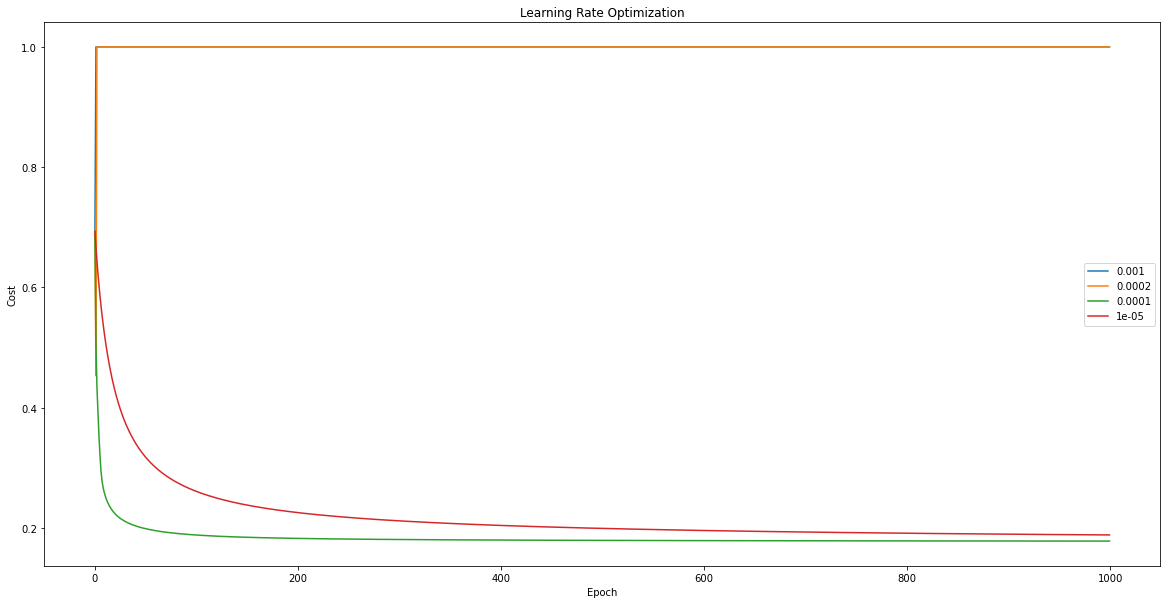

In [12]:
plt.figure(figsize=(20,10))
plt.title('Learning Rate Optimization')
for i in learning_rates:
    plt.plot(model_scores[i])
plt.legend(labels=learning_rates)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

The optimal learning rate is 0.0001. Lower learning rates will reduce cost to same/similar amount but at slower rate as limiting factor is convergance not number of iterations. Thus 0.0001 is preferred.

### Training

In [13]:
theta, num_steps, costs = logisticregression.fit(X_train, y_train, learn_rate=0.0001, convergance=0.0000001)

In [14]:
print('Weights:',theta, '\n', 'Iterations:', num_steps)

Weights: [[-2.30237618 -0.67607712  0.14382982  0.6670636  -0.26565777 -0.06645344
  -2.6237119  -0.62123631 -1.58656357 -0.04773293  0.30907544 -0.6831542
   0.42736039 -0.22382646 -3.36103567 -0.86317725 -0.904439    0.4676148
   0.18940551  1.21578548 -0.22719562 -0.36069742  0.08385205  0.37467906
  -0.10920604 -0.49926301 -0.75932723 -0.19653906 -0.68779752 -0.94297803
  -0.2611715 ]] 
 Iterations: 3160


In [15]:
y_pred=logisticregression.predict(theta, X_test)

### Evaluation

In [16]:
print('Correct #:',np.sum(y_test==y_pred) ,'Accuracy:', np.sum(y_test==y_pred)/y_test.shape[0])

Correct #: 2049 Accuracy: 0.926729986431479


In [17]:
print('\n',metrics.classification_report(y_true=y_test, y_pred=y_pred, digits=3))


               precision    recall  f1-score   support

           0      0.927     0.943     0.935      1231
           1      0.927     0.906     0.916       980

    accuracy                          0.927      2211
   macro avg      0.927     0.925     0.926      2211
weighted avg      0.927     0.927     0.927      2211



Specificity of 0.943 and sensitivity of 0.906. f1 score is better for legitimate case, which is not ideal for phishing detection

Confusion matrix showing True negatives, false positives, false negatives, and true positives. 

In [18]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = [0,1]))

[[1161   70]
 [  92  888]]


In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_pred, pos_label=1)

In [20]:
roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_pred)

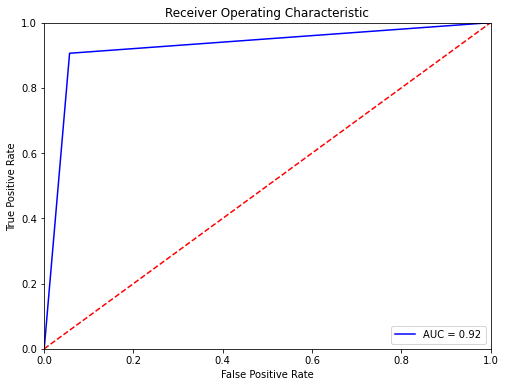

In [21]:
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()